# Open AI tools and customization

## Part 1 — Hugging Face

### What is Hugging Face 🤗?

* ML/AI open-source Ecosystem
  * platform, tools, and community
* Hub/Repository for open:
  * pre-trained *models* and
  * ML/AI ready *datasets*
  * demo *apps*

  for various **tasks**
* Offers *libraries* for interacting with the Hub

### What are tasks?

**Tasks** describe the “shape” of each model’s API (inputs and outputs).


<p align="center"><img src="https://drive.google.com/uc?export=view&id=1xDAws-cwDVqPWVYkyaValKv896Hf1J88" alt="diagram" width="400"/></p>
<p align="center"><sub><i>Image source: Hugging Face Docs</i></sub></p>

* **image classification**
  * input image -> vector of one score per class -> argmax = class
* **image segmentation**
  * input image -> per-pixel class score -> per-pixel argmax = class masks

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1_LxbwlGyqSPx6laM2LqCLdaLWk_jUkDn" align="center" alt="diagram" width="400"/></p>
<p align="center"><sub><i>Image source: ChatGPT generated</i></sub></p>




## Part 2 — HuggingFace Datasets

### How to interact with Hugging Face datasets?

* Filter datasets by task
  * image segmentation
      
      tree cover dataset 4.6k rows https://huggingface.co/datasets/restor/tcd
      
      tree cover sample 237 rows https://huggingface.co/datasets/restor/tcd-nc
* Explore and analize data on the Hub
  * view the dataset card
      > The dataset contains pairs of images, semantic masks and object segments (instance polygons).
      >
      >Where known, each image is also tagged with its terrestrial biome index [-1, 14].

  * run queries in the dataset studio

      https://huggingface.co/datasets/restor/tcd-nc/sql-console/zQ4yMoB

      ```
      SELECT biome_name, annotation FROM test WHERE biome = 1 LIMIT 10
      ```
      https://huggingface.co/datasets/restor/tcd-nc/sql-console/zoJd5dv
      ```
      SELECT biome_name, COUNT(*) FROM train GROUP BY biome_name
      ```

* Use `datasets` library

### How to use the `datasets` library?

In [1]:
from datasets import load_dataset

In [21]:
"""
  Load a (small) dataset
"""
dataset = load_dataset("restor/tcd-nc")

In [22]:
"""
 A DatasetDict contains data splits
"""
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_rows: 237
    })
    test: Dataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_rows: 35
    })
})


In [23]:
print("Splits:", list(dataset.keys()))

Splits: ['train', 'test']


In [24]:
"""
  HuggingFace datasets are Arrow tables
"""
type(dataset['train'])

datasets.arrow_dataset.Dataset

In [25]:
print("Features:", dataset["train"].features)

Features: {'image_id': Value('int64'), 'image': Image(mode=None, decode=True), 'height': Value('int16'), 'width': Value('int16'), 'annotation': Image(mode=None, decode=True), 'oam_id': Value('string'), 'license': Value('string'), 'biome': Value('int8'), 'crs': Value('string'), 'bounds': List(Value('float32'), length=4), 'validation_fold': Value('int8'), 'biome_name': Value('string'), 'lat': Value('float32'), 'lon': Value('float32'), 'segments': Value('string'), 'meta': Value('string'), 'coco_annotations': Value('string')}


In [26]:
dataset["train"].shape

(237, 17)

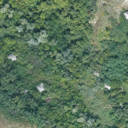

In [37]:
dataset["train"]["image"][0].resize((128, 128))

In [38]:
"""
  Stream a (big/large) dataset
  Preview and sample a dataset without downloading it all
"""
iter_dataset = load_dataset("restor/tcd", streaming=True)

In [39]:
"""
  An IterableDatasetDict contains splits of iterable data
"""
print(iter_dataset)

IterableDatasetDict({
    train: IterableDataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_shards: 7
    })
    test: IterableDataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_shards: 1
    })
})


In [40]:
type(iter_dataset['train'])

datasets.iterable_dataset.IterableDataset

In [54]:
it = iter(iter_dataset['train'])

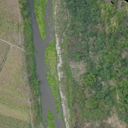

In [61]:
sample = next(it)
sample["image"].resize((128, 128))

### Are HuggingFace datasets FAIR?

* **Findable**
* **Accessible**
* **Interoperable**
* **Reusable**


## Part 3 — HuggingFace Models

The 🤗 Transformers library provides the functionality to create and use  models.

The Model Hub contains millions of pretrained models that anyone can download and use. You can also upload your own models to the Hub!


## Part 4 — GenAI tasks?

Running LLMs Locally (Ollama & vLLM)
(Notes and optional code snippets showing usage.)

Why is Hugging Face a Community?

Community Collaboration: As a social platform, it fosters collaboration among AI enthusiasts, researchers, and developers to share knowledge, improve models, and work together on projects.

Tools and Resources: Hugging Face provides tools, demos, documentation, and tutorials to help users learn and experiment with AI models, making it a resource for skill development in the AI field.